In [51]:
from IPython.display import Markdown as md

_nb_loc = "dataquest.ipynb"
_nb_title = "Objective Data Quest"

_nb_safeloc = _nb_loc.replace('/', '%2F')
md("""
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/AllOneeeee/DataQuest24">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>
""".format(_nb_loc, _nb_title, _nb_safeloc))


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/AllOneeeee/DataQuest24">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>


In [52]:
print("Hello World")

Hello World


In [53]:
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")  # Ignore all warnings

In [54]:
import tensorflow as tf

print(tf.version.VERSION)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

2.13.0
GPU device not found


In [55]:
import pandas as pd

data = pd.read_csv("data/train.csv").sample(20000, random_state=42)
data.head()

,id,origin_host,origin_port,response_host,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,...,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size,traffic
249288,CGL6jh3FTuQDkshEz3,103.255.15.27,38352,103.255.15.23,42001,NaN,20360.699029,20360.699029,40721.398058,NaN,...,0.0,0.0,0.0,NaN,49.114227,NaN,29200.0,0.0,NaN,Benign
218418,CDJWUi3DXWSnyQ7Q7g,103.255.15.23,57816,8.8.8.8,53,0.048963,20.423556,20.423556,40.847112,1.0,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,Background
405357,CXbnlS18EdGC1nlPzj,103.255.15.150,41292,128.199.242.104,443,0.267080,37.441955,NaN,86.116497,NaN,...,0.0,5.0,0.0,NaN,267080.068588,0.0,29200.0,65160.0,402.0,Benign
393323,C9ynHU3tYjz8hw5W8l,103.255.15.27,57124,103.255.15.23,42001,0.000110,9078.580087,NaN,18157.160173,1.0,...,0.0,0.0,0.0,NaN,110.149384,0.0,29200.0,0.0,29200.0,Background
321678,Cu1Erw1vlEM0Wv6MWe,103.255.15.23,35896,8.8.8.8,53,0.024094,41.504339,41.504339,NaN,1.0,...,NaN,0.0,0.0,0.0,24093.866348,0.0,0.0,NaN,NaN,Benign


In [56]:
def calculate_missing_values(data):
    miss = data.isna().sum()
    miss_proportion = (miss / len(data)) * 100
    output_train = pd.DataFrame({
        'Missing Values': miss,
        'Proportion (%)': miss_proportion
    })    
    return output_train

def highlight_missing_values(val):
    if val > 30:
        color = 'background-color: red'
    elif val > 20:
        color = 'background-color: orange'
    elif val > 10:
        color = 'background-color: yellow'
    else:
        color = ''
    return color

print("Number of observations: {}".format(len(data)))
miss_data = calculate_missing_values(data)
styled_miss_data = miss_data.style.applymap(highlight_missing_values, subset=['Proportion (%)'])

styled_miss_data

Number of observations: 20000


,Missing Values,Proportion (%)
id,0,0.000000
origin_host,0,0.000000
origin_port,0,0.000000
response_host,0,0.000000
response_port,0,0.000000
flow_duration,5576,27.880000
forward_packets_per_sec,5868,29.340000
backward_packets_per_sec,4419,22.095000
flow_packets_per_sec,5285,26.425000
down_up_ratio,5753,28.765000


In [57]:
def calculate_missing_values_by_category(data, category_column):
    # Group by the category column
    grouped = data.groupby(category_column)
    
    # Prepare a dictionary to hold the results
    results = []
    
    for category, group in grouped:
        miss = group.isna().sum()
        miss_proportion = (miss / len(group)) * 100
        
        # Create a DataFrame for each category's missing values
        category_df = pd.DataFrame({
            'Category': category,
            'Column Name': miss.index,
            'Missing Values': miss.values,
            'Proportion (%)': miss_proportion.values
        })
        
        results.append(category_df)
    
    # Concatenate the results into a single DataFrame
    output = pd.concat(results).reset_index(drop=True)
    return output

def highlight_missing_values(val):
    if val > 30:
        color = 'background-color: red'
    elif val > 20:
        color = 'background-color: orange'
    elif val > 10:
        color = 'background-color: yellow'
    else:
        color = ''
    return color

# Example usage
category_column = 'traffic'
miss_data_by_category = calculate_missing_values_by_category(data, category_column)
styled_miss_data_by_category = miss_data_by_category.style.applymap(highlight_missing_values, subset=['Proportion (%)'])

print("Number of observations: {}".format(len(data)))
styled_miss_data_by_category

Number of observations: 20000


,Category,Column Name,Missing Values,Proportion (%)
0,Background,id,0,0.000000
1,Background,origin_host,0,0.000000
2,Background,origin_port,0,0.000000
3,Background,response_host,0,0.000000
4,Background,response_port,0,0.000000
5,Background,flow_duration,833,13.470246
6,Background,forward_packets_per_sec,901,14.569858
7,Background,backward_packets_per_sec,1645,26.600906
8,Background,flow_packets_per_sec,1933,31.258085
9,Background,down_up_ratio,952,15.394567


<Axes: >

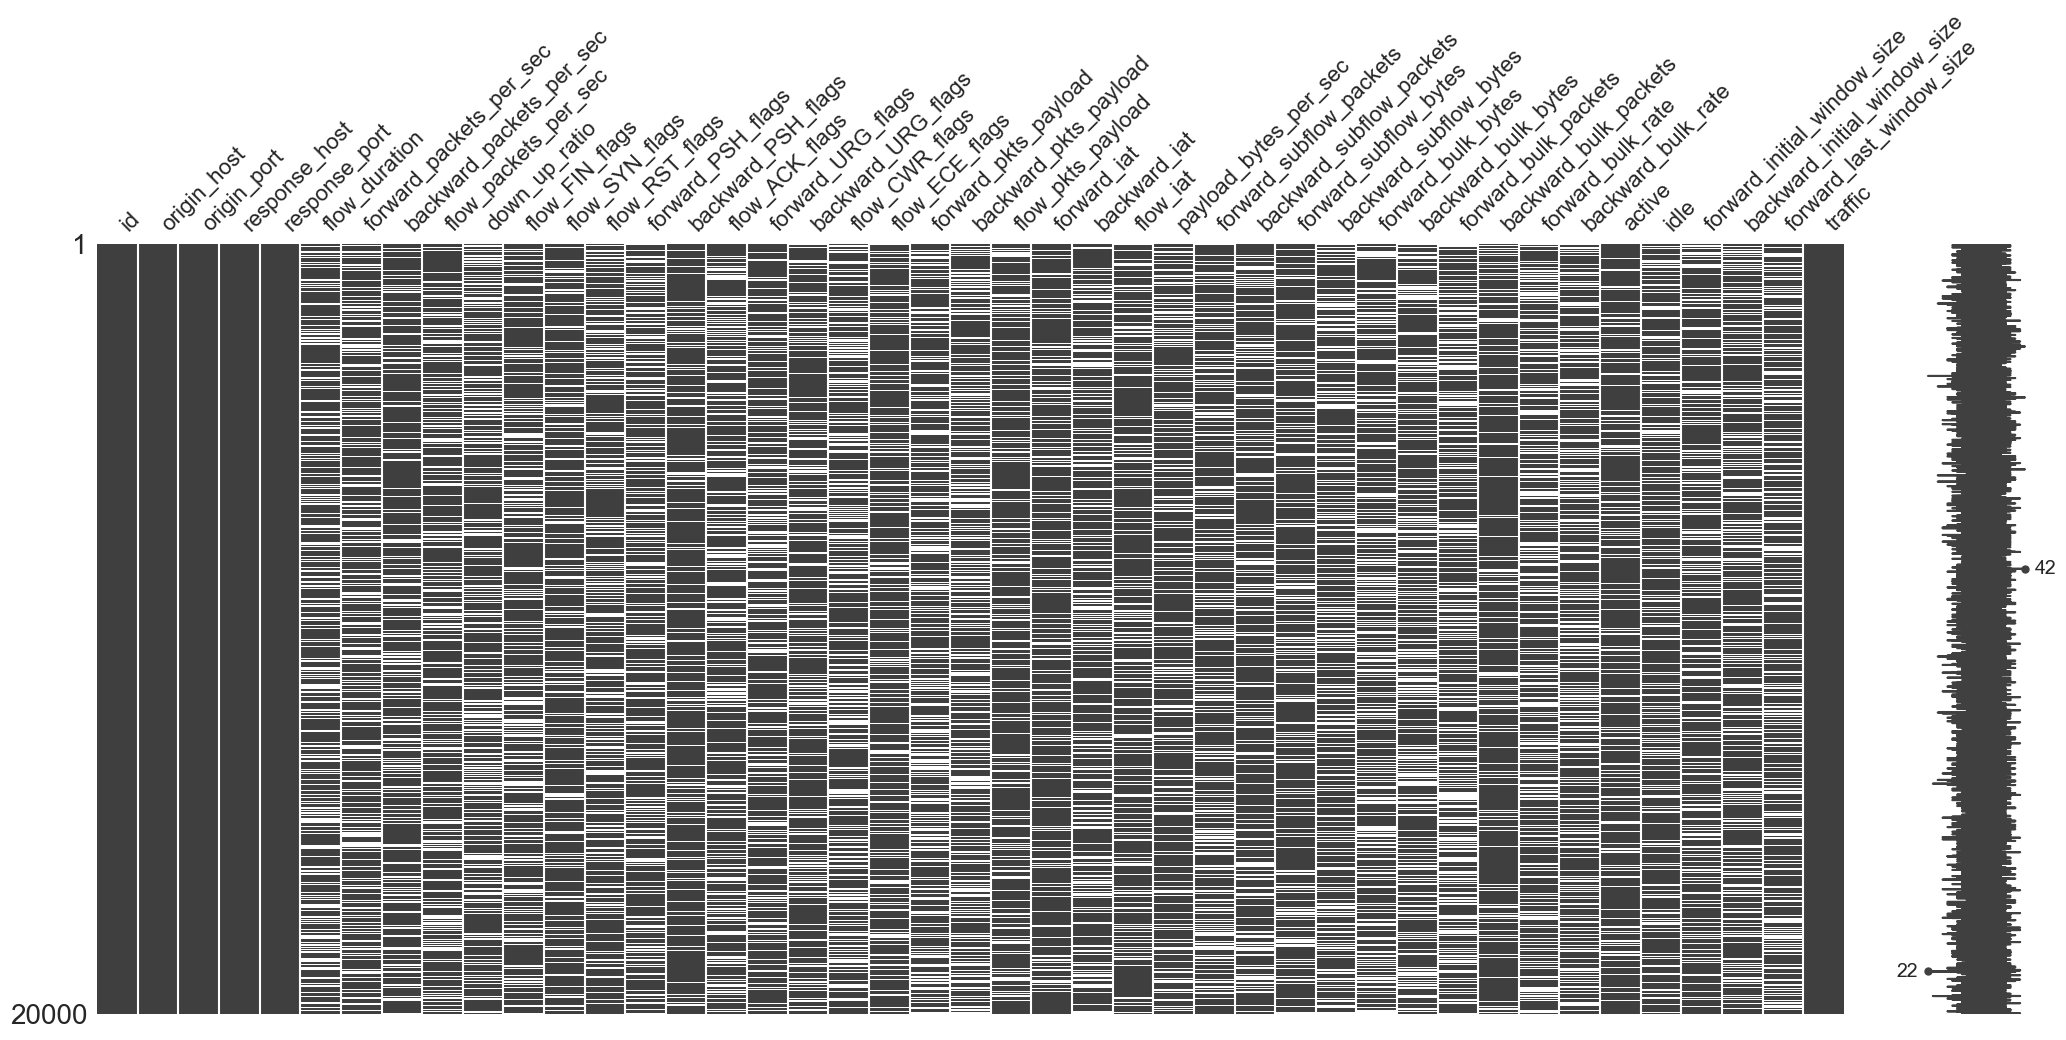

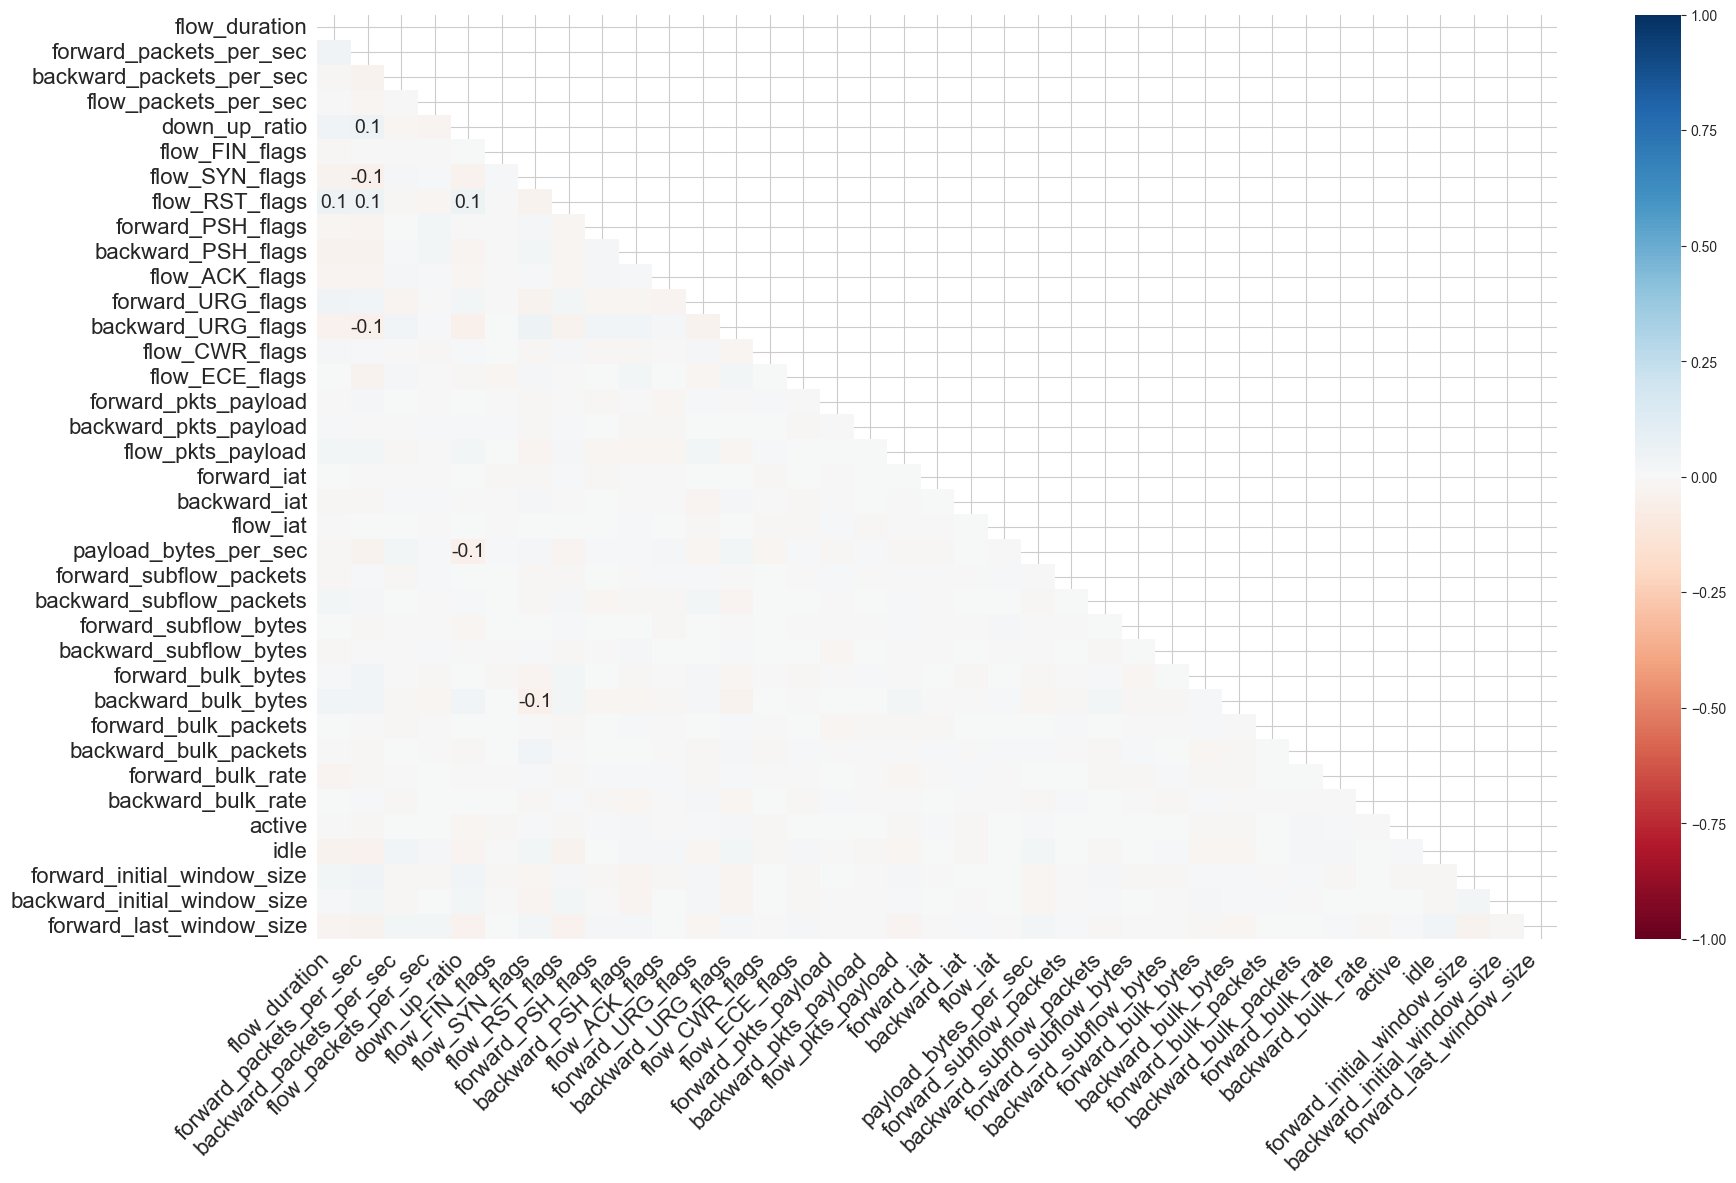

In [58]:
import missingno as msno

msno.matrix(data)
msno.heatmap(data)

In [59]:
def fill_packets(row):
    # Fill flow_packets_per_sec
    if pd.isna(row['flow_packets_per_sec']):
        row['flow_packets_per_sec'] = row['forward_packets_per_sec'] + row['backward_packets_per_sec']
    
    # Fill forward_packets_per_sec and backward_packets_per_sec
    if pd.isna(row['forward_packets_per_sec']) and not pd.isna(row['backward_packets_per_sec']):
        row['forward_packets_per_sec'] = row['backward_packets_per_sec']
        row['flow_packets_per_sec'] = row['forward_packets_per_sec'] + row['backward_packets_per_sec']
    if pd.isna(row['backward_packets_per_sec']) and not pd.isna(row['forward_packets_per_sec']):
        row['backward_packets_per_sec'] = row['forward_packets_per_sec']
        row['flow_packets_per_sec'] = row['forward_packets_per_sec'] + row['backward_packets_per_sec']
    if pd.isna(row['forward_packets_per_sec']) and pd.isna(row['backward_packets_per_sec']):
        row['forward_packets_per_sec'] = row['flow_packets_per_sec'] / 2
        row['backward_packets_per_sec'] = row['flow_packets_per_sec'] / 2
    
    # Fill down_up_ratio
    if not pd.isna(row['backward_packets_per_sec']) and not pd.isna(row['forward_packets_per_sec']) and row['forward_packets_per_sec'] != 0:
        row['down_up_ratio'] = row['backward_packets_per_sec'] / row['forward_packets_per_sec']
    
    # Fill flow_pkts_payload
    if pd.isna(row['flow_pkts_payload']):
        if not pd.isna(row['forward_pkts_payload']) and not pd.isna(row['backward_pkts_payload']):
            row['flow_pkts_payload'] = (row['forward_pkts_payload'] + row['backward_pkts_payload']) / 2
        elif not pd.isna(row['forward_pkts_payload']):
            row['flow_pkts_payload'] = row['forward_pkts_payload']
        elif not pd.isna(row['backward_pkts_payload']):
            row['flow_pkts_payload'] = row['backward_pkts_payload']
    
    # Fill forward_pkts_payload and backward_pkts_payload
    if pd.isna(row['forward_pkts_payload']) and pd.isna(row['backward_pkts_payload']):
        if not pd.isna(row['flow_pkts_payload']):
            row['forward_pkts_payload'] = row['flow_pkts_payload']
            row['backward_pkts_payload'] = row['flow_pkts_payload']
    elif pd.isna(row['forward_pkts_payload']):
        if not pd.isna(row['backward_pkts_payload']):
            row['forward_pkts_payload'] = 2*row['flow_pkts_payload'] - row['backward_pkts_payload']
    elif pd.isna(row['backward_pkts_payload']):
        if not pd.isna(row['forward_pkts_payload']):
            row['backward_pkts_payload'] = 2*row['flow_pkts_payload'] - row['forward_pkts_payload']
    
    return row

data = data.apply(fill_packets, axis=1)

In [60]:
miss_data = calculate_missing_values(data)
miss_data

,Missing Values,Proportion (%)
id,0,0.000
origin_host,0,0.000
origin_port,0,0.000
response_host,0,0.000
response_port,0,0.000
flow_duration,5576,27.880
forward_packets_per_sec,285,1.425
backward_packets_per_sec,285,1.425
flow_packets_per_sec,285,1.425
down_up_ratio,727,3.635


In [61]:
features_to_drop = miss_data[miss_data["Proportion (%)"] > 20].index
data_cleaned = data.drop(columns=features_to_drop)
print("Dropped features:", features_to_drop)

Dropped features: Index(['flow_duration', 'flow_FIN_flags', 'flow_SYN_flags', 'flow_RST_flags',
       'forward_PSH_flags', 'flow_ACK_flags', 'forward_URG_flags',
       'backward_URG_flags', 'flow_CWR_flags', 'backward_iat', 'flow_iat',
       'payload_bytes_per_sec', 'forward_subflow_packets',
       'backward_subflow_packets', 'backward_subflow_bytes',
       'forward_bulk_bytes', 'backward_bulk_bytes', 'forward_bulk_packets',
       'forward_bulk_rate', 'backward_bulk_rate', 'idle',
       'forward_initial_window_size', 'backward_initial_window_size',
       'forward_last_window_size'],
      dtype='object')


In [62]:
from sklearn.impute import KNNImputer

remove_col = ['id', 'origin_host', 'origin_port', 'response_host', 'response_port', 'traffic']
traffic_col = data['traffic'].copy()
data = data.drop(columns=remove_col)

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
knn_imputer = KNNImputer(n_neighbors=5)

data = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)
data['traffic'] = traffic_col.values
data = data.reset_index(drop=True)
data.to_csv("data/processing/data_fill.csv", index=False)

In [63]:
CLASSES = 'Background', 'Benign', 'Probing', 'Bruteforce', 'XMRIGCC CryptoMiner', 'Bruteforce-XML'.split()

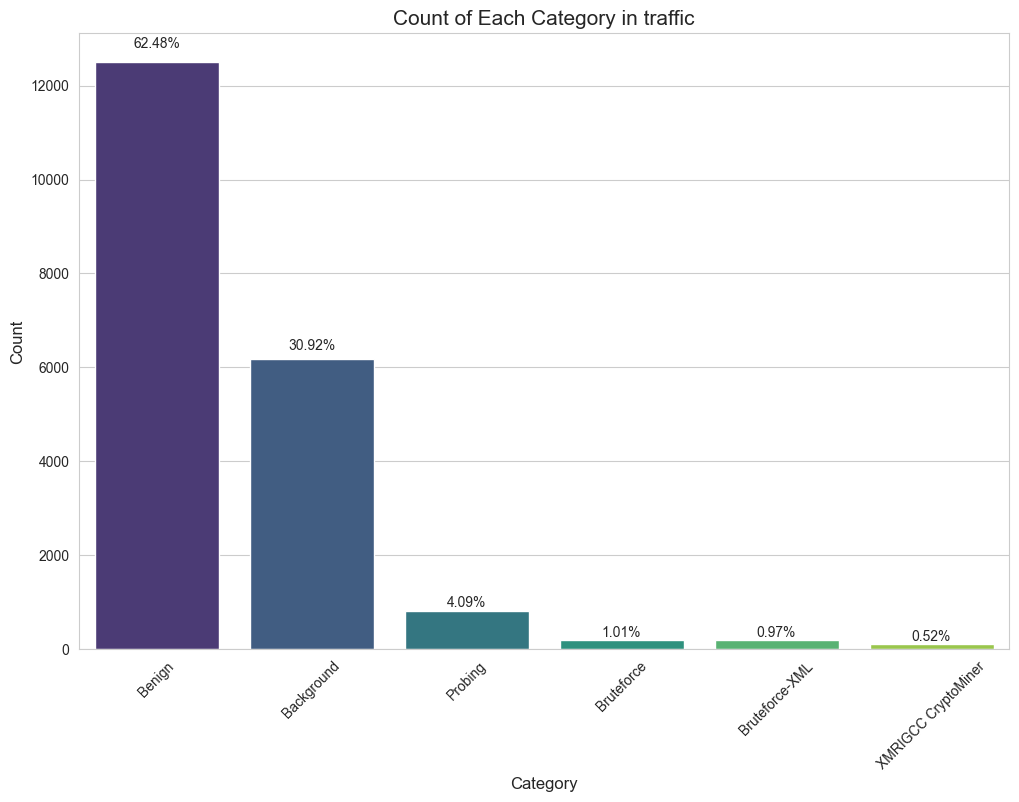

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_category_counts(data, column_name):
    
    counts = data[column_name].value_counts()
    
    sorted_counts = counts.sort_values(ascending=False)
    sorted_proportions = sorted_counts / sorted_counts.sum()
    
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette='viridis')
    
    for bar in ax.patches:
        height = bar.get_height()
        category_name = bar.get_x() + bar.get_width() / 2
        proportion = sorted_proportions[sorted_counts.index[int(category_name)]]
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02 * height, 
                f'{proportion:.2%}', 
                ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Count of Each Category in {column_name}', fontsize=15)
    plt.xticks(rotation=45)  
    plt.show()

plot_category_counts(data, 'traffic')

In [65]:
data.duplicated().sum()

2263

In [66]:
def mean_by_traffic(data, output_file):
    mean_by_traffic_numerical = data.groupby('traffic')[numerical_columns].mean().round(2)
    mean_by_traffic_numerical.to_csv(output_file, index=True)
    print(mean_by_traffic_numerical)
    print(f"Mean values by traffic category have been saved to '{output_file}'.")

mean_by_traffic(data, 'data/processing/mean_by_traffic_numerical.csv')

                     flow_duration  forward_packets_per_sec   
traffic                                                       
Background                   12.53                  3220.96  \
Benign                        5.54                  1182.71   
Bruteforce                   13.48                    25.62   
Bruteforce-XML               13.30                     2.70   
Probing                       2.05                    39.84   
XMRIGCC CryptoMiner           1.46                     1.45   

                     backward_packets_per_sec  flow_packets_per_sec   
traffic                                                               
Background                            3203.18               6424.14  \
Benign                                1141.40               2324.11   
Bruteforce                              25.45                 51.07   
Bruteforce-XML                           2.48                  5.17   
Probing                                 45.16                 85.00  

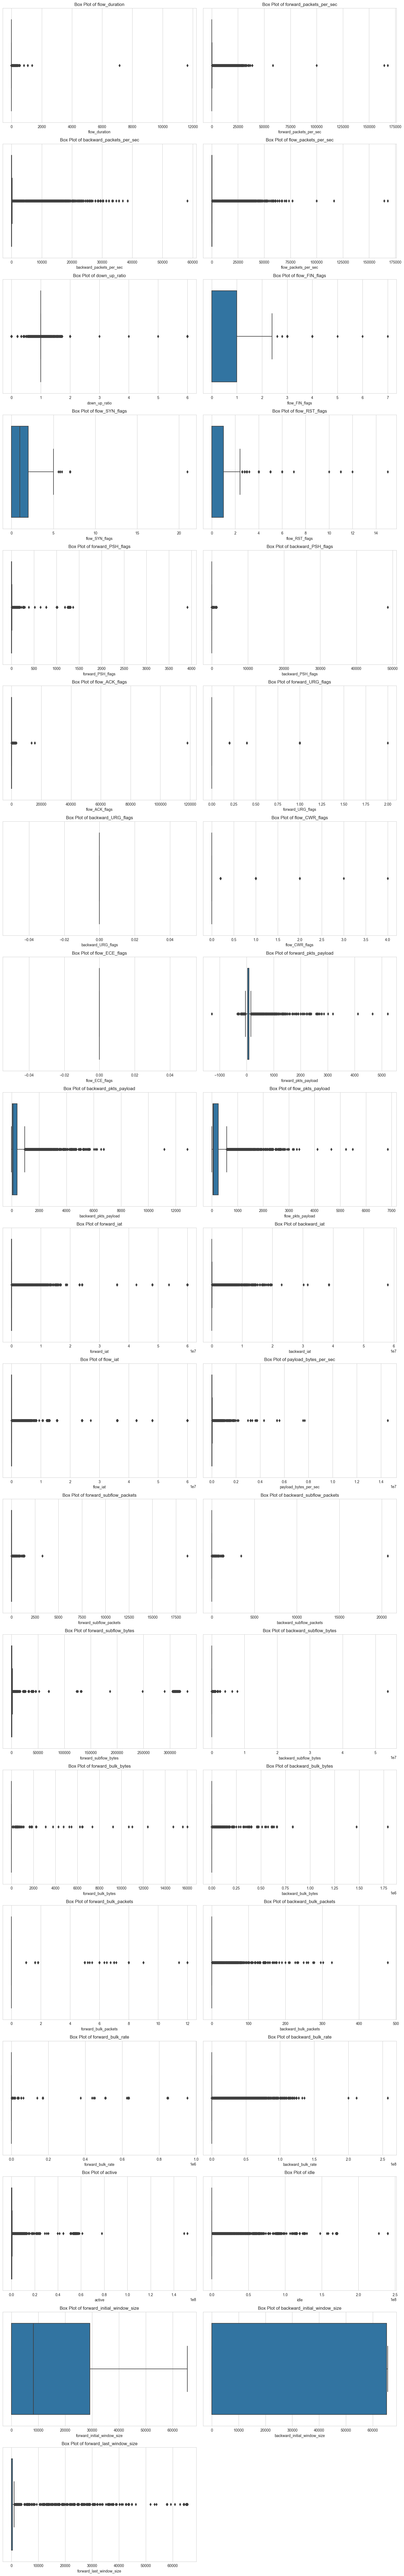

In [67]:
def plot_boxplots(data):
    num_cols=2
    num_plots = len(numerical_columns)
    num_rows = (num_plots + num_cols - 1) // num_cols 

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 7.5, num_rows * 5))
    axes = axes.flatten()  

    for i, column in enumerate(numerical_columns):
        sns.boxplot(x=data[column], ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')

    for j in range(len(numerical_columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_boxplots(data)

For big data problems, outliers are generally not a problem in fitting the regression to
be used in predicting new data. However, outliers are central to anomaly detection,
where finding outliers is the whole point. The outlier could also correspond to a case
of fraud or an accidental action. In any case, detecting outliers can be a critical busi‐
ness need.

In [68]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['traffic'], axis=1)  # Features 
y = data['traffic']                        # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of train data: {} \nNumber of test data: {}".format(len(X_train), len(y_test)))

Number of train data: 16000 
Number of test data: 4000


In [69]:
# from collections import Counter
# from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTEENN
# 
# print("Class Distribution before SMOTEENN:", Counter(y_train))
# smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
# X_train, y_train = smote_enn.fit_resample(X_train, y_train)
# print("Class Distribution after SMOTEENN:", Counter(y_train))

In [70]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

classifier_names = ["LR", 'kNN', 'Random Forest', 'Boosted Trees']
classifiers = [LogisticRegression(random_state=42),
              KNeighborsClassifier(5),
              RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1,
                                     random_state=42),
              GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=5, random_state=42)]

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

classifier_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Gradient Boosting']
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

# Define the sampling techniques
sampling_techniques = {
    'Original': (None, None),
    'SMOTE': (SMOTE(random_state=42), None),
    'Tomek': (None, TomekLinks()),
    'SMOTEENN': (SMOTEENN(random_state=42), None)
}

sampling_accuracies = {name: [] for name in sampling_techniques.keys()}

train_sizes = [0.25, 0.50, 0.75, 1.00]
optimal_balanced_accuracies = {name: (0, 0) for name in classifier_names}  # (accuracy, size)

for name, (smote, tomek) in sampling_techniques.items():
    for size in train_sizes:
        if size < 1.0:
            X_partial_train, _, y_partial_train, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
        else:
            X_partial_train, y_partial_train = X_train, y_train
        
        # Apply sampling technique
        if smote is not None:
            X_resampled, y_resampled = smote.fit_resample(X_partial_train, y_partial_train)
        elif tomek is not None:
            X_resampled, y_resampled = tomek.fit_resample(X_partial_train, y_partial_train)
        else:
            X_resampled, y_resampled = X_partial_train, y_partial_train
        
        # Train and evaluate classifiers
        for clf_name, model in zip(classifier_names, classifiers):
            print(f"Training {clf_name} with {name} sampling and {size * 100:.0f}% of the training data...")
            pipeline = Pipeline([('sampling', smote if smote is not None else tomek if tomek is not None else None), ('classifier', model)])
            pipeline.fit(X_resampled, y_resampled)
            y_pred = pipeline.predict(X_test)
            balanced_acc = balanced_accuracy_score(y_test, y_pred)
            sampling_accuracies[name].append(balanced_acc)
            
            # Track the optimal accuracy
            if balanced_acc > optimal_balanced_accuracies[clf_name][0]:
                optimal_balanced_accuracies[clf_name] = (balanced_acc, size)
            
            print(f"Model {clf_name} with {name} sampling trained. Balanced Accuracy: {balanced_acc:.4f}")

# Plotting the results
plt.figure(figsize=(12, 8))

for name in sampling_accuracies:
    plt.plot(train_sizes, sampling_accuracies[name], marker='o', label=name)

plt.title('Balanced Accuracy vs. Training Data Size with Different Sampling Techniques')
plt.xlabel('Training Data Size (%)')
plt.ylabel('Balanced Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Print optimal results
for clf_name in classifier_names:
    optimal_acc, optimal_size = optimal_balanced_accuracies[clf_name]
    print(f"Optimal Balanced Accuracy for {clf_name}: {optimal_acc:.4f} with {optimal_size * 100:.0f}% of the training data.")

Training Logistic Regression with Original sampling and 25% of the training data...
Model Logistic Regression with Original sampling trained. Balanced Accuracy: 0.1577
Training K-Nearest Neighbors with Original sampling and 25% of the training data...
Model K-Nearest Neighbors with Original sampling trained. Balanced Accuracy: 0.4985
Training Random Forest with Original sampling and 25% of the training data...
Model Random Forest with Original sampling trained. Balanced Accuracy: 0.4867
Training Gradient Boosting with Original sampling and 25% of the training data...
Model Gradient Boosting with Original sampling trained. Balanced Accuracy: 0.4802
Training Logistic Regression with Original sampling and 50% of the training data...
Model Logistic Regression with Original sampling trained. Balanced Accuracy: 0.1607
Training K-Nearest Neighbors with Original sampling and 50% of the training data...
Model K-Nearest Neighbors with Original sampling trained. Balanced Accuracy: 0.4137
Training

In [49]:
import numpy as np
import seaborn as sns

def display_confusion_matrix(cmat, score, f1, best_model):
    plt.figure(figsize=(12, 10))  
    ax = plt.gca()
    
    sns.heatmap(cmat, annot=True, fmt='.2f', cmap='Reds', ax=ax, 
                xticklabels=CLASSES, yticklabels=CLASSES,
                cbar=True, cbar_kws={'shrink': 0.8}, annot_kws={"size": 10})
    
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_title('Confusion Matrix for {}'.format(best_model), fontsize=15)
    
    titlestring = ""
    if score is not None:
        titlestring += 'Balanced Accuracy = {:.3f} '.format(score)
    if f1 is not None:
        titlestring += '\nF1-Score = {:.3f} '.format(f1)
    if len(titlestring) > 0:
        plt.figtext(0.8, 1, titlestring, 
                    horizontalalignment='right', verticalalignment='bottom', 
                    fontsize=12, color='#804040', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
    
    plt.tight_layout()  
    plt.show()

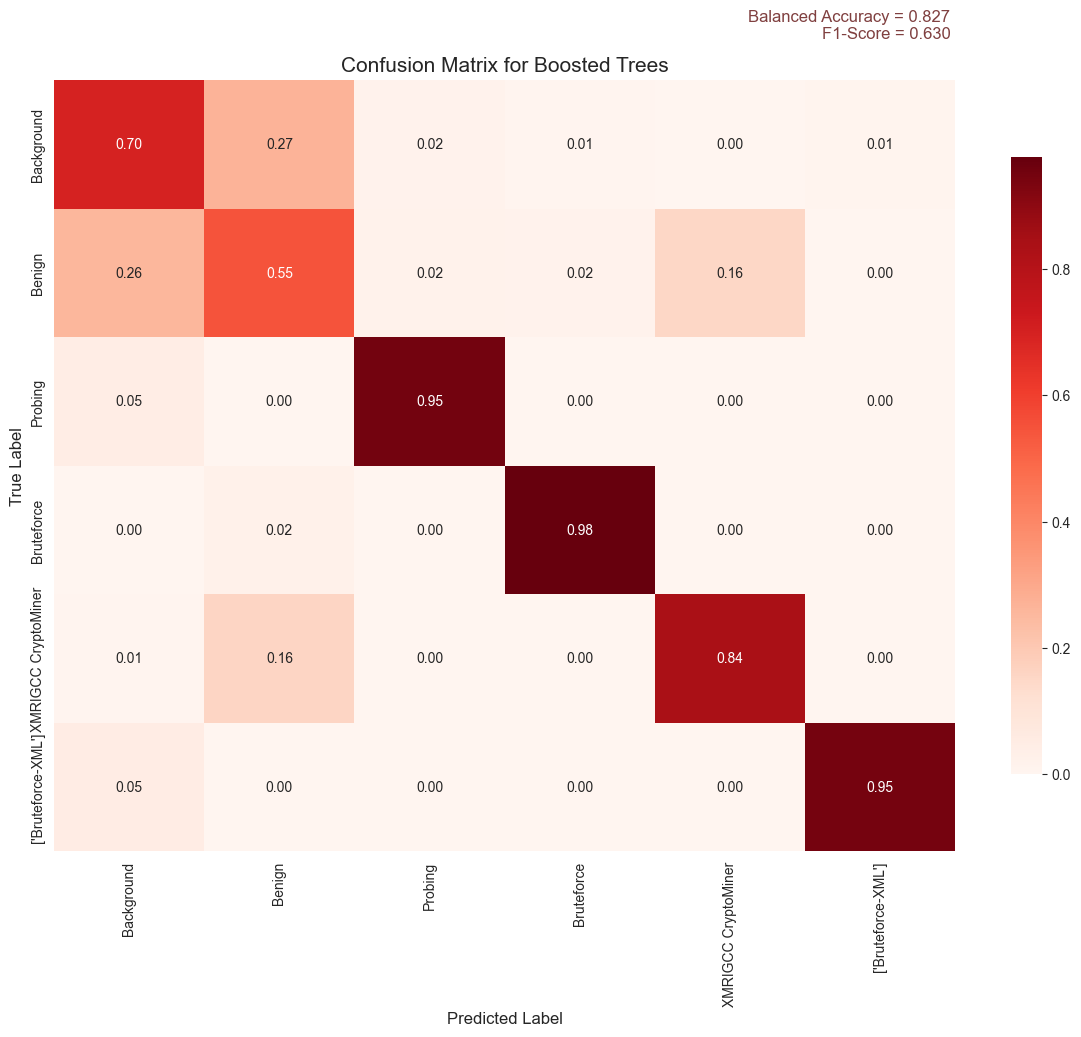

In [50]:
from sklearn.metrics import confusion_matrix, f1_score

best_model_name = max(optimal_balanced_accuracies, key=lambda name: optimal_balanced_accuracies[name][0])
optimal_acc, optimal_size = optimal_balanced_accuracies[best_model_name]

if optimal_size < 1.0:
    X_partial_train, _, y_partial_train, _ = train_test_split(X_train, y_train, train_size=optimal_size, random_state=42)
else:
    X_partial_train, y_partial_train = X_train, y_train

best_model = None
for name, model in zip(classifier_names, classifiers):
    if name == best_model_name:
        best_model = model
        best_model.fit(X_partial_train, y_partial_train)
        break

y_pred = best_model.predict(X_test)

cmat = confusion_matrix(y_test, y_pred, normalize='true')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Step 5: Display the confusion matrix
display_confusion_matrix(cmat, balanced_acc, f1, best_model_name)
